In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import os
import tensorflow as tf

In [61]:
forest = pd.read_csv("C:/Users/SARTHAK/Desktop/ProgrammingCourses/DataScience/kaggle/forest_cover_dec_21/tabular-playground-series-dec-2021/train.csv")
forest_test = pd.read_csv("C:/Users/SARTHAK/Desktop/ProgrammingCourses/DataScience/kaggle/forest_cover_dec_21/tabular-playground-series-dec-2021/test.csv")
print("data shape",forest.shape)
print(forest.columns)


data shape (4000000, 56)
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type3

In [62]:
forest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [63]:
Ids = forest_test["Id"].values
forest.drop(['Id'],axis=1,inplace=True)
forest_test.drop(['Id'],axis=1,inplace=True)

In [64]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,...,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,2.980192e+03,1.515857e+02,1.509754e+01,2.713154e+02,5.166262e+01,1.766642e+03,2.118375e+02,2.210614e+02,1.408109e+02,1.581407e+03,...,3.746200e-02,3.782075e-02,1.199500e-02,1.605350e-02,1.071275e-02,1.220750e-02,4.075150e-02,3.923925e-02,3.161850e-02,1.771335e+00
std,2.890482e+02,1.099611e+02,8.546731e+00,2.265497e+02,6.821597e+01,1.315610e+03,3.075996e+01,2.223134e+01,4.369864e+01,1.127616e+03,...,1.898910e-01,1.907625e-01,1.088629e-01,1.256813e-01,1.029465e-01,1.098111e-01,1.977140e-01,1.941637e-01,1.749822e-01,8.938060e-01
min,1.773000e+03,-3.300000e+01,-3.000000e+00,-9.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,-2.770000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,7.810000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.966000e+03,1.230000e+02,1.400000e+01,2.130000e+02,3.100000e+01,1.436000e+03,2.180000e+02,2.240000e+02,1.420000e+02,1.361000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,3.217000e+03,2.470000e+02,2.000000e+01,3.610000e+02,7.800000e+01,2.365000e+03,2.330000e+02,2.370000e+02,1.690000e+02,2.084000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,4.383000e+03,4.070000e+02,6.400000e+01,1.602000e+03,6.470000e+02,7.666000e+03,3.010000e+02,2.790000e+02,2.720000e+02,8.075000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [65]:
forest.std(axis=0)

Elevation                              289.048167
Aspect                                 109.961122
Slope                                    8.546731
Horizontal_Distance_To_Hydrology       226.549680
Vertical_Distance_To_Hydrology          68.215966
Horizontal_Distance_To_Roadways       1315.609890
Hillshade_9am                           30.759956
Hillshade_Noon                          22.231335
Hillshade_3pm                           43.698639
Horizontal_Distance_To_Fire_Points    1127.616169
Wilderness_Area1                         0.439285
Wilderness_Area2                         0.199813
Wilderness_Area3                         0.475831
Wilderness_Area4                         0.146092
Soil_Type1                               0.128677
Soil_Type2                               0.173036
Soil_Type3                               0.065247
Soil_Type4                               0.190985
Soil_Type5                               0.124372
Soil_Type6                               0.088934


In [66]:
forest = forest.drop(['Soil_Type7','Soil_Type15'],axis = 1)
forest_test = forest_test.drop(['Soil_Type7','Soil_Type15'],axis = 1)

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>,
        <AxesSubplot:title={'center':'Hillshade_9am'}>],
       [<AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:title={'center':'Wilderness_Area1'}>,
        <AxesSubplot:title={'center':'Wilderness_Area2'}>,
        <AxesSubplot:title={'center':'Wilderness_Area3'}>,
        <AxesSubplot:title={'center':'Wilderness_Area4'}>],
       [<AxesSubplot:title={'center':'Soil_Type1'}>,
        <AxesSubplot:title={'center':'Soil_Type2'}>,
        <AxesSubplot:title={'center':'S

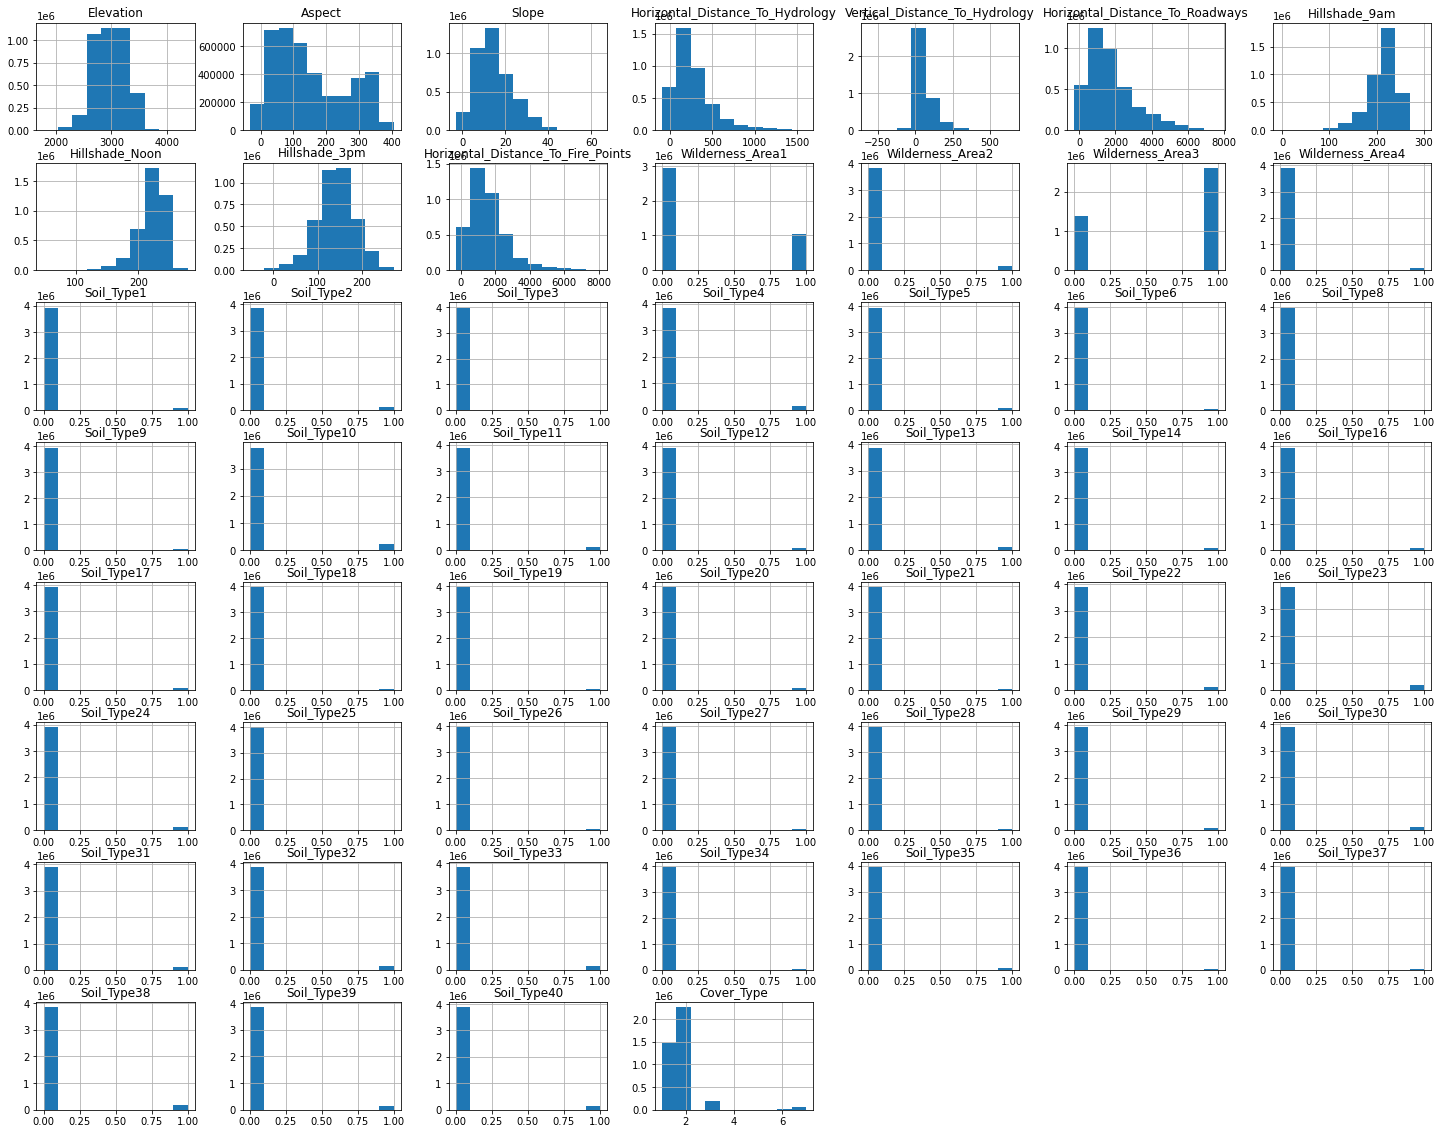

In [67]:
forest.hist(bins=10, figsize=(25, 20))

In [68]:
from sklearn.model_selection import train_test_split
train_set, vald_set = train_test_split(forest, test_size=0.2, random_state=64)

In [69]:
Y_train = train_set.pop("Cover_Type")
X_train = train_set
Y_vald = vald_set.pop("Cover_Type")
X_vald = vald_set

In [70]:
X_train.values.shape

(3200000, 52)

In [71]:
np.unique(Y_train)

array([1, 2, 3, 4, 6, 7], dtype=int64)

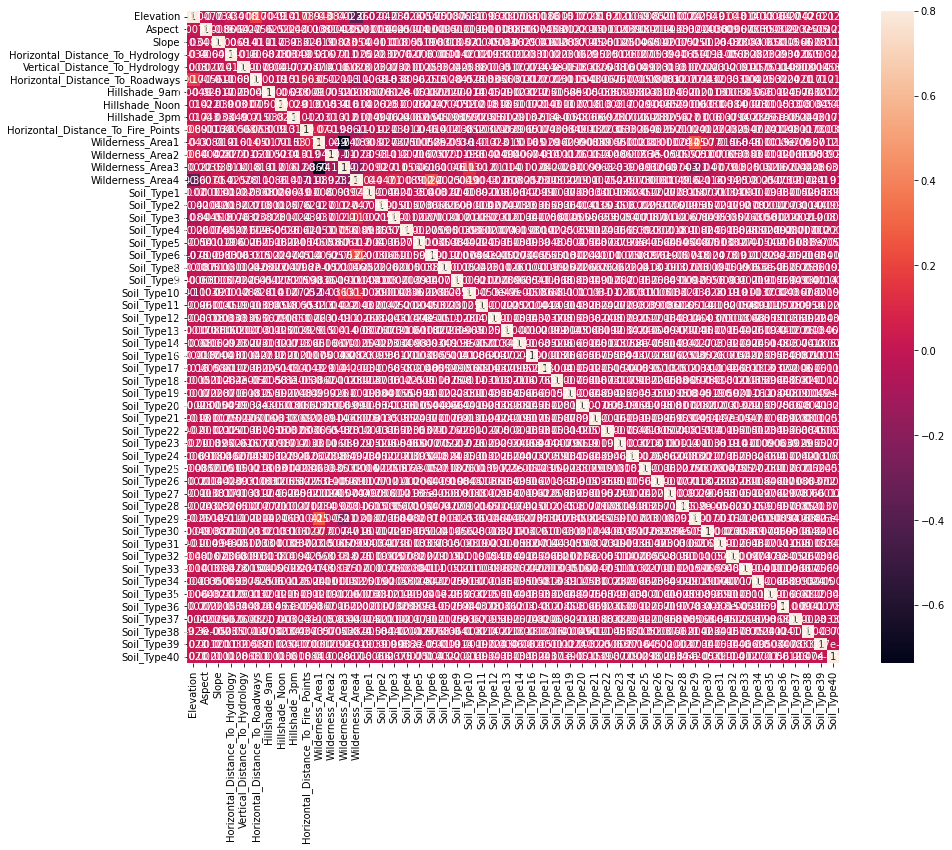

In [72]:
corr_matrix = X_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True,vmax=.8, square=True);

In [73]:
######## ANN   ###############
X_train=X_train.values
X_vald=X_vald.values
Y_train=Y_train.values
Y_vald=Y_vald.values

In [74]:
lr = LogisticRegression(random_state=0,solver="liblinear").fit(X_train,Y_train)

In [75]:
y_pred = lr.predict(X_vald)
accuracy_score(Y_vald, y_pred)

0.89214875

In [76]:
cross_val_score(lr, X_train, Y_train, cv=5, scoring='accuracy')

array([0.89605469, 0.89588437, 0.88930937, 0.89622187, 0.89720625])

In [77]:
Y_train-=1
Y_vald-=1

In [78]:
X_train.shape

(3200000, 52)

In [79]:
np.unique(Y_train)

array([0, 1, 2, 3, 5, 6], dtype=int64)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_vald = sc.transform (X_vald)
forest_test = sc.transform (forest_test)

C:\Users\SARTHAK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [90]:
X_train.shape

(3200000, 52)

In [91]:
from tensorflow import keras
net = keras.models.Sequential([
keras.layers.Flatten(input_shape=[52,]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(50, activation="relu"),
keras.layers.Dense(7, activation="softmax")
])

In [92]:
net.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [93]:
net.save("forest_cover_1_model.h5")

In [94]:
model = keras.models.load_model("forest_cover_1_model.h5")

In [95]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 52)                0         
                                                                 
 dense_12 (Dense)            (None, 100)               5300      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 7)                 357       
                                                                 
Total params: 10,707
Trainable params: 10,707
Non-trainable params: 0
_________________________________________________________________


In [96]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [97]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [98]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("forest_cover_1_model.h5")
history = model.fit(X_train, Y_train, epochs=4, callbacks=[tensorboard_cb])

Epoch 1/4
100000/100000 [==============================] - 67s 660us/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9477
Epoch 2/4
100000/100000 [==============================] - 62s 616us/step - loss: 0.1050 - sparse_categorical_accuracy: 0.9546
Epoch 3/4
100000/100000 [==============================] - 63s 632us/step - loss: 0.1006 - sparse_categorical_accuracy: 0.9560
Epoch 4/4
100000/100000 [==============================] - 63s 626us/step - loss: 0.0986 - sparse_categorical_accuracy: 0.9566


In [99]:
y_pred = np.argmax(model.predict(X_vald),axis=1)
y_pred

array([1, 1, 2, ..., 1, 0, 1], dtype=int64)

In [100]:
accuracy_score(Y_vald, y_pred)

0.95764875